In the [problem for the education minister]({{ site.baseurl
}}/chapters/10/havana_math) we had a sample of fast-track-marked exams from
2019, and we found that the median mark was 60.  We wondered what we could say
about the eventual median when we have the marks for all 8000 or so students.

After a bit of development, we found, in the [reverse probability with
bars]({{ site.baseurl }}/chapters/10/bayes_bars) page, that we could use some
probability calculations to draw conclusions about the state of the world, from some result.  In that page, we calculated the probability of the state of the world (a box we have been given) from a result (drawing a red ball).

Now we want to draw a conclusion about the state of the world (the eventual median of all the 2019 exams) from a result (the median of the fast-marked sample of 50 2019 exams).

We will call the 50 fast-track-marked exams the *sample*.  When the 2019
marking is finished, we will have around 8000 marks.  We will call this the
*population*.  We want to draw conclusions about the *population* from the
*sample*.   In particular we want to draw conclusions about the population
median from the sample median.

Let us start with the following problem:  what is the probability that we will
observe a *sample* median of 60, given that the *population* median is 69.

Referring back to our box and ball problem, this probability is the equivalent
of the probability of getting a red ball from a given box.  Given a state of
the world (the population median) what the is the probability of the result
(the sample median).  Once we have probabilities like these, we will be able
to use the logic you have already seen to get the *reverse* probability - how
likely was any particular state of the world (population median), given the
result (the sample median).

Returning our problem: how will we calculate the probability of a sample median of 60, given a population median of 69?

As usual, this is a problem of *sampling*.  If the median of the population is
69, and we draw a sample of 50 marks, then the median of the sample will be
vary somewhat depending on the sample. That is, the *sample median* will be 69
plus or minus a bit.  As usual, we need to quantify what we mean by "a bit".

For example, remember the population of 2018 marks, that do have a median of 69.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
havana_2018 = pd.read_csv('havana_math_2018.csv')
marks_2018 = havana_2018['mark'].dropna()
marks_2018.median()

69.0

To get the sampling distribution of the median of a sample of 50, we would have to calculate the median for every possible sample of 50 values from the 8000 or so marks.  As usual, we make do with an *estimate* of the sampling distribution by taking many thousands of samples.

In [3]:
# Take 10000 samples, calculate their medians.
n_iters = 10000
sample_medians = np.zeros(n_iters)
for i in np.arange(n_iters):
    sample = np.random.choice(marks_2018, size=50, replace=False)
    sample_medians[i] = np.median(sample)
sample_medians[:5]

array([74. , 60. , 50.5, 76. , 71. ])

The sampling distribution looks like this:

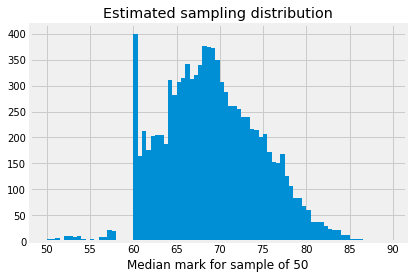

In [4]:
plt.hist(sample_medians, bins=np.arange(50, 90, 0.5))
plt.xlabel('Median mark for sample of 50')
plt.title('Estimated sampling distribution');